# SIRD model playground

Given the following equations of the SIRD model

\begin{align*}
\frac{dS}{dt} &= -\beta \cdot S \cdot I \\
\frac{dI}{dt} &= \beta \cdot S \cdot I - (\gamma \cdot I) - (\delta \cdot I) \\
\frac{dR}{dt} &= \gamma \cdot I \\
\frac{dD}{dt} &= \delta \cdot I
\end{align*}

Given the initial conditions: *population, cases, deaths, recovered* and *Basic reproductive rate (R0), Mortality rate ratio (M), Average infectios period (P)* it is possible to compute the correspondent ODEs and then obtain the *S, I, R, D* params

In [1]:
from epidemic_modelling.pso import LSTMConfig
from sird_base_model import SIRD
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
from pso import MyPSO, BaselineConfig, TimeVaryingConfig
import os

class ExperimentType:
    BASELINE = 0
    TIME_VARYING = 1
    LSTM = 2

Experiment_type = ExperimentType.TIME_VARYING
#Experiment_type = ExperimentType.LSTM
# Experiment_type = ExperimentType.BASELINE

if Experiment_type == ExperimentType.BASELINE:
    config = BaselineConfig()
elif Experiment_type == ExperimentType.TIME_VARYING:
    config = TimeVaryingConfig()
else:
    raise ValueError("Invalid Experiment Type")
    
SEGMENTS = config.SEGMENTS if Experiment_type == ExperimentType.TIME_VARYING else 1
#config = LSTMConfig()

DAYS = config.DAYS
LAG = config.LAG
print(F"USING LAG: {LAG}, DAYS: {DAYS}")
parent_class = MyPSO(config=config)

USING LAG: 0, DAYS: 7


In [2]:
#First wave is february to may 2020
FIRST_WAVE = False
#Post first wave was june to sep 2020
FIRST_WAVE_POST = False
#Second wave was Oct to Dec 2020
SECOND_WAVE = False
#Third wave was jan to may 2021
THIRD_WAVE = False
#Post Third Wave was june to oct 2021
THIRD_WAVE_POST = False
#Fourth wave was nov 2021 to march 2022
FOURTH_WAVE = False

if FIRST_WAVE: 
    LAG = 0
    SEGMENTS = 15
elif FIRST_WAVE_POST:
    LAG = 16 *DAYS
    SEGMENTS = 19
elif SECOND_WAVE:
    LAG = 35 * DAYS
    SEGMENTS = 11
elif THIRD_WAVE:
    LAG = 48 *DAYS
    SEGMENTS = 22
elif THIRD_WAVE_POST:
    LAG = 67 *DAYS
    SEGMENTS = 23 
elif FOURTH_WAVE:
    LAG = 90 *DAYS
    SEGMENTS = 20

#Creating folders where we are going to save the plots for this specific experiment
PLOT_FOLDER = 'exp_LAG_'+str(LAG*DAYS)+'_SEG_'+str(SEGMENTS)
plot_folder_path = os.path.join(os.getcwd(), '../plots/'+PLOT_FOLDER)
if not os.path.exists(plot_folder_path):
    os.makedirs(plot_folder_path)

plot_inner_folder_name = 'POP_'+str(config.POPULATION_SIZE)+'_GEN_'+str(int(config.MAX_GENERATIONS))
plot_inner_folder_path = os.path.join(plot_folder_path, plot_inner_folder_name)
print(plot_inner_folder_path)
if not os.path.exists(plot_inner_folder_path):
    os.makedirs(plot_inner_folder_path)


/Users/canova/Desktop/Uni/UNI/MAGISTRALE/AIS/2_SEM/Bio Inspired Artificial Intelligence/proj/Epidemic-modelling/epidemic_modelling/../plots/exp_LAG_0_SEG_8/POP_300.0_GEN_100


## Loading the solution file of the PSO run on SIRD

In [3]:
import os
print(os.getcwd())

/Users/canova/Desktop/Uni/UNI/MAGISTRALE/AIS/2_SEM/Bio Inspired Artificial Intelligence/proj/Epidemic-modelling/epidemic_modelling


In [4]:
def get_params_from_file():
    FOLDER = f"../data/solutions/{config.NAME}.csv"
    file = os.path.join(os.getcwd(), FOLDER)
    print(file)
    with open(file) as f:
        res = pd.read_csv(f)
        # convert to single dict with keys = [params]
        res = res.to_dict(orient="records")
    return res

In [5]:
pso_params = get_params_from_file()
print(len(pso_params))
print(pso_params)

/Users/canova/Desktop/Uni/UNI/MAGISTRALE/AIS/2_SEM/Bio Inspired Artificial Intelligence/proj/Epidemic-modelling/epidemic_modelling/../data/solutions/time_varying.csv
8
[{'beta': 0.3430037769398482, 'gamma': 0.024376224465122, 'delta': 0.007860509828757}, {'beta': 0.2336260649097245, 'gamma': 0.0229046681979126, 'delta': 0.0133582884981462}, {'beta': 0.239439652878966, 'gamma': 0.0234424744962711, 'delta': 0.020528827045565}, {'beta': 0.1347082795283012, 'gamma': 0.0187825759032573, 'delta': 0.0146094899586957}, {'beta': 0.1358499547901522, 'gamma': 0.0215235851412722, 'delta': 0.018118536142376}, {'beta': 0.004095298267472, 'gamma': 0.0081075789772699, 'delta': 0.0029813300043106}, {'beta': 0.1188231726103895, 'gamma': 0.034887443446947, 'delta': 0.0163914273035379}, {'beta': 0.001, 'gamma': 0.0441204313918257, 'delta': 0.001}]


## Loading and plotting daily processed data

,Original_I,Original_R,Original_D
0,221,1,7
1,311,1,10
2,385,3,12
3,588,45,17
4,821,46,21
5,1049,50,29
6,1577,83,34
7,1835,149,52
8,2263,160,79
9,2706,276,107


,Original_S
0,59999771
1,59999678
2,59999600
3,59999350
4,59999112
5,59998872
6,59998306
7,59997964
8,59997498
9,59996911


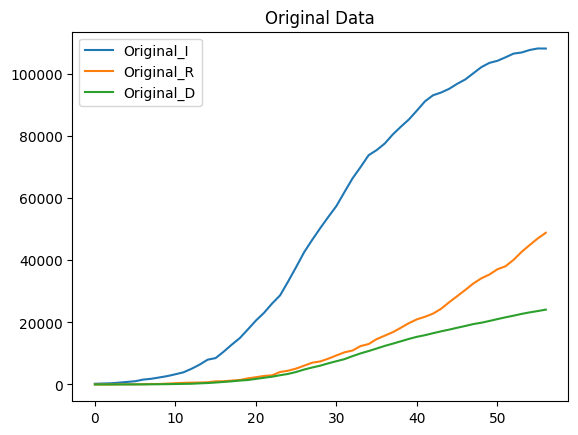

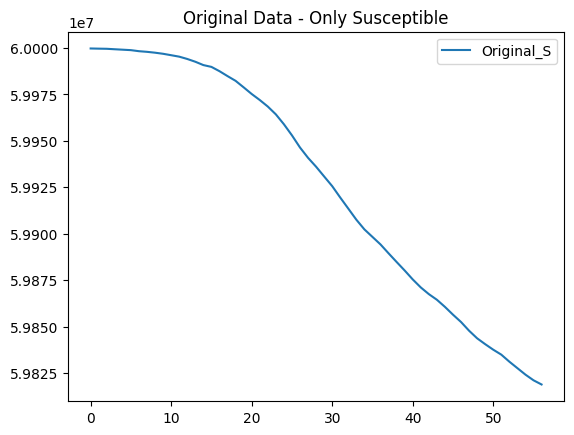

In [7]:
USE_SUSCEPTIBLE = True

# Viz real data
df = pd.read_csv('../data/daily_processed.csv')
# Lineplot totale_positivi, dimessi_guariti, deceduti giving iloc

if Experiment_type == ExperimentType.BASELINE:
    row_interval = slice(LAG,LAG+DAYS+1)
elif Experiment_type == ExperimentType.TIME_VARYING:
    row_interval = slice(LAG,(DAYS*SEGMENTS)+LAG+1)
else:
    row_interval = slice(LAG,(DAYS*config.SEGMENTS)+LAG+1)
original_df = df.iloc[row_interval, 1:4]
# Rename columns
original_df.columns = ['Original_I', 'Original_R', 'Original_D']
display(original_df)
original_df.plot(title="Original Data")



if USE_SUSCEPTIBLE:
    # Show only susceptible
    original_only_sus_df = df.iloc[row_interval, 4:5]
    original_only_sus_df.columns = ['Original_S']
    display(original_only_sus_df)
    original_only_sus_df.plot(title="Original Data - Only Susceptible")


## Computing SIRD from PSO obtained params

{'population': 60000000, 'initial_I': 221.0, 'initial_R': 1.0, 'initial_D': 7.0, 'initial_S': 59999771.0}
0
1
2
3
4
5
6
7


,Computed_I,Computed_R,Computed_D
0,221.000000,1.000000,7.000000
1,301.594692,7.321792,9.038565
2,411.424273,15.936765,11.816603
3,561.071397,27.675030,15.601797
4,765.692285,43.725475,20.777524
5,1045.123720,65.644167,27.845563
6,1426.031743,95.522914,37.480450
7,1945.765462,136.291638,50.626988
8,2370.303702,185.563083,79.362710
9,2887.419662,245.579651,114.365122


,Computed_S
0,5.999977e+07
1,5.999968e+07
2,5.999956e+07
3,5.999940e+07
4,5.999917e+07
5,5.999886e+07
6,5.999844e+07
7,5.999787e+07
8,5.999736e+07
9,5.999675e+07


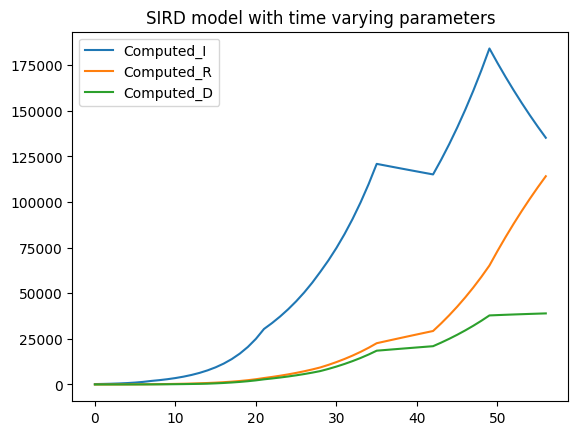

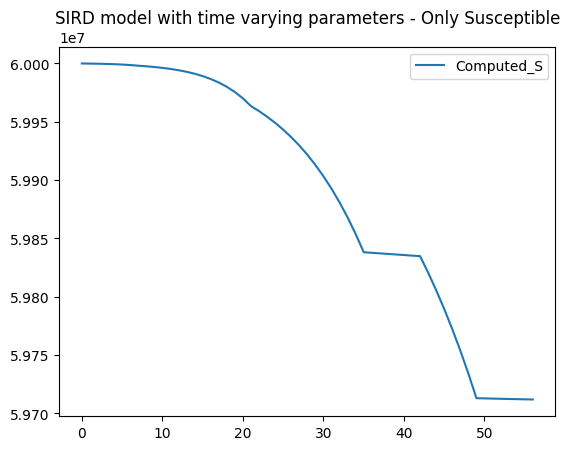

In [8]:
# Computing SIRD values using SIRD model + PSO obtained params

# Initial state of the system
initial_conditions, _ = parent_class.get_sird_from_data(start_week=LAG, end_week=LAG+DAYS, population=parent_class.population)
model_df = pd.DataFrame({'Computed_I': [], 'Computed_R': [], 'Computed_D': []})
model_df = pd.concat([model_df, pd.DataFrame({'Computed_I': initial_conditions['initial_I'], 'Computed_R': initial_conditions['initial_R'], 'Computed_D': initial_conditions['initial_D']}, index=[0])])

if USE_SUSCEPTIBLE:
    model_only_sus_df = pd.DataFrame({'Computed_S': initial_conditions['initial_S']}, index=[0])
    
print(initial_conditions)
if Experiment_type == ExperimentType.BASELINE:
    params = pso_params[0]
    model_base = SIRD(beta=params['beta'], gamma=params['gamma'], delta=params['delta'])
    model_base.solve(initial_conditions, time_frame=DAYS)
    s,i,r,d, _ = model_base.get_sird_values().values()
    model_df = pd.DataFrame({'Computed_I': i, 'Computed_R': r, 'Computed_D': d})
    model_df.reset_index(drop=True, inplace=True)
    display(model_df)
    model_df.plot(title='SIRD model with baseline parameters')

    if USE_SUSCEPTIBLE:
        model_only_sus_df = pd.DataFrame({'Computed_S': s})
        display(model_only_sus_df)
        model_only_sus_df.plot(title='SIRD model with baseline parameters - Only Susceptible')

elif Experiment_type == ExperimentType.TIME_VARYING:
    # Iterate on each segment
    for segment_idx, params in enumerate(pso_params):
        print(segment_idx)
        model_tvar = SIRD(beta=params['beta'], gamma=params['gamma'], delta=params['delta'])
        model_tvar.solve(initial_conditions, time_frame=DAYS)
        s,i,r,d, _ = model_tvar.get_sird_values().values()
        initial_conditions = {'population': parent_class.population, 'initial_I': i[-1], 'initial_R': r[-1], 'initial_D': d[-1], 'initial_S': s[-1]}
        model_df = pd.concat([model_df, pd.DataFrame({'Computed_I': i[1:], 'Computed_R': r[1:], 'Computed_D': d[1:]})])
        if USE_SUSCEPTIBLE:
            model_only_sus_df = pd.concat([model_only_sus_df, pd.DataFrame({'Computed_S': s[1:]})])
    model_df.reset_index(drop=True, inplace=True)
    display(model_df)
    model_df.plot(title="SIRD model with time varying parameters")

    if USE_SUSCEPTIBLE:
        model_only_sus_df.reset_index(drop=True, inplace=True)
        display(model_only_sus_df)
        model_only_sus_df.plot(title="SIRD model with time varying parameters - Only Susceptible")


Weights = [S: 0.8, I: 5, R: 2, D: 3]
Population: 300.0  Neighbourood: 5
Cognitive Rate: 2.1
Social Rate: 1.2
Inertia: 0.65



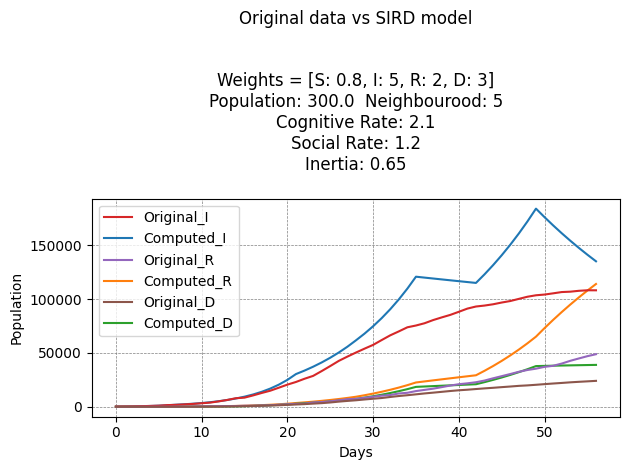

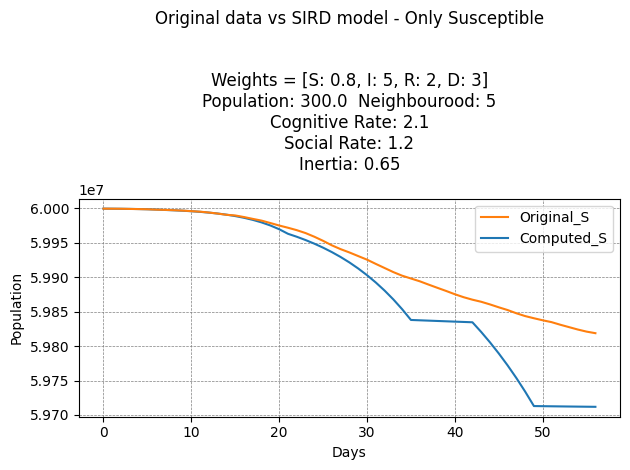

In [9]:
# Compare the original data with the computed sird values
# Change the order of legend items so that i have Original_I, Computed_I, Original_R, Computed_R, Original_D, Computed_D

# params contains an array of dict contianing beta, gamma, delta 
# i want to put them in the title using markdown syntax
params_len = len(pso_params)
# Get all params from the dict given a key. E.g. get_pk(params, 'beta') -> [0.1, 0.2, 0.3]
get_pk = lambda k: [round(p[k],3) for p in pso_params]
params_title = f"\nWeights = [S: {config.weight_S}, I: {config.weight_I}, R: {config.weight_R}, D: {config.weight_D}]\nPopulation: {config.POPULATION_SIZE}  Neighbourood: {config.neighborhood}\nCognitive Rate: {config.cognitive_rate}\nSocial Rate: {config.social_rate}\nInertia: {config.inertia}\n"
print(params_title)
original_df.plot(ax=model_df.plot(), title=f'Original data vs SIRD model\n\n{params_title}')
# 0 3 1 5 2 5
handles, labels = plt.gca().get_legend_handles_labels()
order = [3, 0, 4, 1, 5, 2]
plt.legend([handles[idx] for idx in order], [labels[idx] for idx in order])
# Add x axis and y axis labels
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
plt.xlabel("Days")
plt.ylabel("Population")
PLOT_NAME = f"cr_{config.cognitive_rate}_sr_{config.social_rate}_in_{config.inertia}_nh_{config.neighborhood}"
plt.tight_layout()
plt.savefig(os.path.join(plot_inner_folder_path,PLOT_NAME+'_NO_SUSC.png'))

if USE_SUSCEPTIBLE:
    original_only_sus_df.plot(ax=model_only_sus_df.plot(), title=f'Original data vs SIRD model - Only Susceptible\n\n{params_title}')
    handles, labels = plt.gca().get_legend_handles_labels()
    order = [1, 0]
    plt.legend([handles[idx] for idx in order], [labels[idx] for idx in order])
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
    # Add x axis and y axis labels
    plt.xlabel("Days")
    plt.ylabel("Population")
    plt.tight_layout()
    plt.savefig(os.path.join(plot_inner_folder_path,PLOT_NAME+'_SUSC.png'))
    

In [10]:
original_df.columns

Index(['Original_I', 'Original_R', 'Original_D'], dtype='object')

In [11]:
model_df.columns

Index(['Computed_I', 'Computed_R', 'Computed_D'], dtype='object')

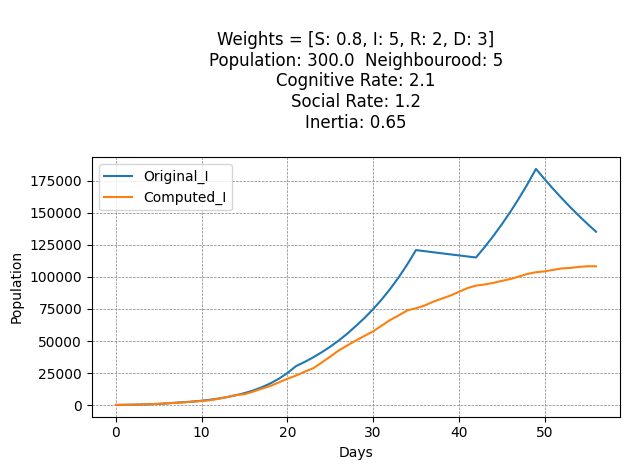

In [12]:
# plot original_df and model_df for each column
original_df['Original_I'].plot(ax=model_df['Computed_I'].plot(), title=f'{params_title}')
# Add labels and legend
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
plt.xlabel("Days")
plt.ylabel("Population")
plt.legend(['Original_I', 'Computed_I'])
plt.tight_layout()
plt.savefig(os.path.join(plot_inner_folder_path,PLOT_NAME+'_I.png'))

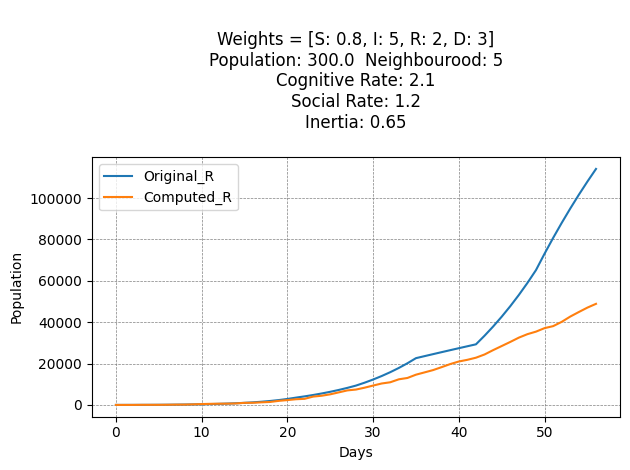

In [13]:
original_df['Original_R'].plot(ax=model_df['Computed_R'].plot(), title=f'{params_title}')
# Add labels and legend
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
plt.xlabel("Days")
plt.ylabel("Population")
plt.legend(['Original_R', 'Computed_R'])
plt.tight_layout()
plt.savefig(os.path.join(plot_inner_folder_path,PLOT_NAME+'_R.png'))

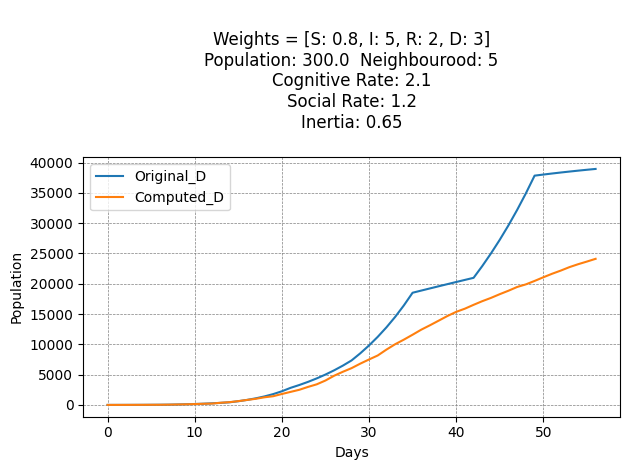

In [14]:
original_df['Original_D'].plot(ax=model_df['Computed_D'].plot(), title=f'{params_title}')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
# Add labels and legend
plt.xlabel("Days")
plt.ylabel("Population")
plt.legend(['Original_D', 'Computed_D'])
plt.tight_layout()
plt.savefig(os.path.join(plot_inner_folder_path,PLOT_NAME+'_D.png'))